In [3]:
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import RocCurveDisplay
from matplotlib import pyplot as plt

from typing import Type

from dtree import Classifier, MyClassifier
from boosting import GradientBooster

In [4]:
!ls

 boosting.ipynb					    __pycache__
 boosting.py					   'UCI HAR Dataset'
 dtree.py					   'UCI HAR Dataset.names'
 human+activity+recognition+using+smartphones.zip  'UCI HAR Dataset.zip'
 __MACOSX


In [5]:
path = './UCI HAR Dataset'
with open(f'{path}/train/X_train.txt') as f:
    X = np.array(list(map(lambda el: list(map(float, el.split())), f.read().split('\n')))[:-1])

with open(f'{path}/train/y_train.txt') as f:
    y = np.array(f.read().split(), dtype=int) - 1

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
my_booster = GradientBooster(MyClassifier, n_estimators=100, max_depth=3)

In [8]:
my_booster.fit(X_train, y_train)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [06:57<00:00,  4.21s/it]


In [9]:
predicts = my_booster.predict(X_test)
precision, recall, f_score, _ = precision_recall_fscore_support(y_test, predicts)

Accuracy: 0.9089055064581917
Precision on class 0: 0.9551020408163265
Recall on class 0: 0.9473684210526315
F1-score on class 0: 0.9512195121951219




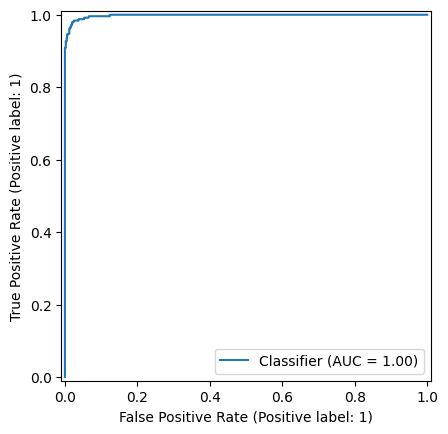

Precision on class 1: 0.9539170506912442
Recall on class 1: 0.9
F1-score on class 1: 0.9261744966442953




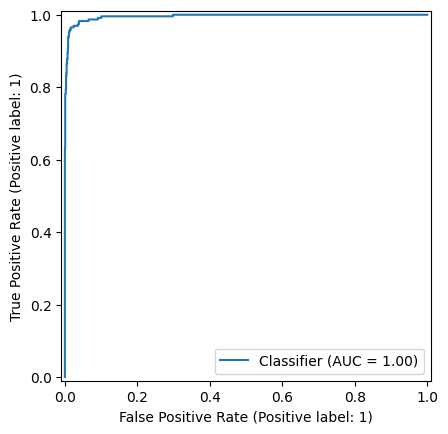

Precision on class 2: 0.85
Recall on class 2: 0.918918918918919
F1-score on class 2: 0.8831168831168831




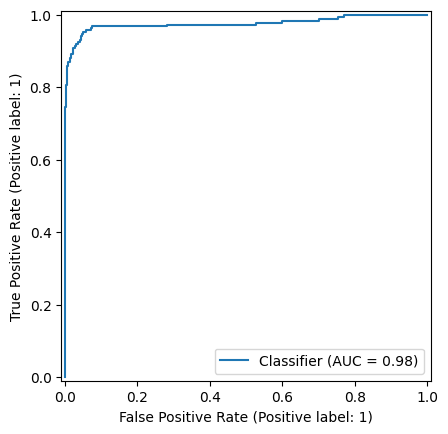

Precision on class 3: 0.7923875432525952
Recall on class 3: 0.9015748031496063
F1-score on class 3: 0.8434622467771639




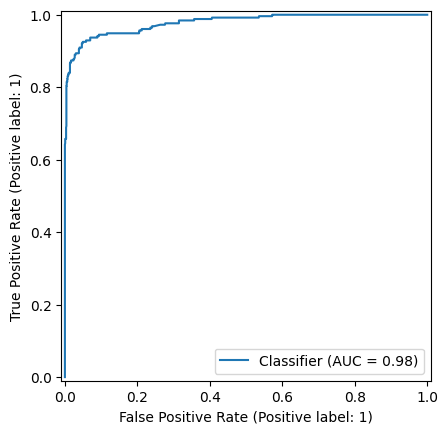

Precision on class 4: 0.9180327868852459
Recall on class 4: 0.7943262411347518
F1-score on class 4: 0.8517110266159695




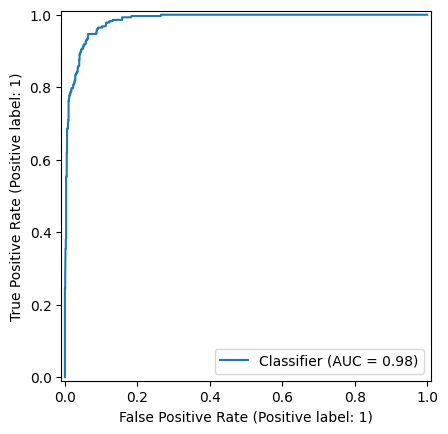

Precision on class 5: 0.9891304347826086
Recall on class 5: 1.0
F1-score on class 5: 0.994535519125683




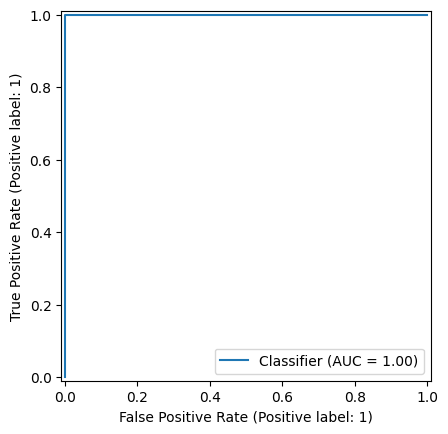

In [10]:
print('Accuracy:', accuracy_score(y_test, predicts))
for i,_ in enumerate(precision):
    print(f'Precision on class {i}: {precision[i]}')
    print(f'Recall on class {i}: {recall[i]}')
    print(f'F1-score on class {i}: {f_score[i]}')
    print('\n')
    probas = my_booster.predict_proba(X_test)
    RocCurveDisplay.from_predictions(np.eye(np.unique(y_test).shape[0])[y_test][:,i], probas[:,i])
    plt.show()